## Введение в анализ данных. ДЗ 2. Python.

ФИО: Копин Борис Александрович

In [357]:
import math

import pandas as pd
import numpy as np
from matplotlib.pylab import plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

Список вакансии с “The Official Website of the City of New York” https://data.cityofnewyork.us/Business/NYC-Jobs/kpav-sd4t

Посчитать распределение имеющихся вакансий по зарплате (считать, что если для вакансии указан диапазон зарплат, реальная зарплата будет равна среднему минимальной и максимальной границ). Нанести на карту информацию с имеющихся предложениях о работе с цветовой маркировкой размера предлагаемой заработной платы. 

example - http://nbviewer.ipython.org/github/lmart999/GIS/blob/master/SF_GIS_Crime.ipynb

In [358]:
# https://data.cityofnewyork.us/api/views/kpav-sd4t/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('./NYC_Jobs.csv')

In [359]:
data.columns = [c.lower().replace(' ', '_') for c in data.columns]
data.head()


,job_id,agency,posting_type,#_of_positions,business_title,civil_service_title,title_code_no,level,salary_range_from,salary_range_to,...,additional_information,to_apply,hours/shift,work_location_1,recruitment_contact,residency_requirement,posting_date,post_until,posting_updated,process_date
0,132719,DEPT OF ENVIRONMENT PROTECTION,External,2,Stationary Engineer (Electric),STATIONARY ENGINEER (ELECTRIC),91645,00,94983,94983,...,Appointments are subject to OMB approval For ...,Click the ''Apply Now'' button,,"3701 Jerome Ave, Bx NY 10467",NaN,New York City residency is generally required ...,10/08/2013 00:00:00,NaN,10/08/2013 00:00:00,10/27/2015 00:00:00
1,132719,DEPT OF ENVIRONMENT PROTECTION,Internal,2,Stationary Engineer (Electric),STATIONARY ENGINEER (ELECTRIC),91645,00,94983,94983,...,Appointments are subject to OMB approval For ...,Click the ''Apply Now'' button,,"3701 Jerome Ave, Bx NY 10467",NaN,New York City residency is generally required ...,10/08/2013 00:00:00,NaN,10/08/2013 00:00:00,10/27/2015 00:00:00
2,132786,DEPT OF ENVIRONMENT PROTECTION,External,1,"Director, Strategic Sourcing",ADMINISTRATIVE PROJECT MANAGER,83008,M2,54740,146276,...,,Click the ''APPLY NOW'' button.,35 Hours per Week/Day,"59-17 Junction Blouvard, Flushing NY",NaN,New York City Residency is not required for th...,10/08/2013 00:00:00,NaN,11/08/2013 00:00:00,10/27/2015 00:00:00
3,132786,DEPT OF ENVIRONMENT PROTECTION,Internal,1,"Director, Strategic Sourcing",ADMINISTRATIVE PROJECT MANAGER,83008,M2,54740,146276,...,,Click the ''APPLY NOW'' button.,35 Hours per Week/Day,"59-17 Junction Blouvard, Flushing NY",NaN,New York City Residency is not required for th...,10/08/2013 00:00:00,NaN,11/08/2013 00:00:00,10/27/2015 00:00:00
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,00,35,35,...,SPECIAL NOTE: 1. This is a temporary assig...,Click the ''Apply Now'' button.,,,NaN,NYCHA has no residency requirement.,01/09/2014 00:00:00,NaN,01/08/2014 00:00:00,10/27/2015 00:00:00


In [360]:
data.columns

Index([u'job_id', u'agency', u'posting_type', u'#_of_positions',
       u'business_title', u'civil_service_title', u'title_code_no', u'level',
       u'salary_range_from', u'salary_range_to', u'salary_frequency',
       u'work_location', u'division/work_unit', u'job_description',
       u'minimum_qual_requirements', u'preferred_skills',
       u'additional_information', u'to_apply', u'hours/shift',
       u'work_location_1', u'recruitment_contact', u'residency_requirement',
       u'posting_date', u'post_until', u'posting_updated', u'process_date'],
      dtype='object')

In [361]:
data[['work_location', 'work_location_1']].describe()

,work_location,work_location_1
count,3429,3429
unique,161,289
top,42-09 28th Street,
freq,498,1164


In [362]:
data[u'salary_mean'] = (data.salary_range_from + data.salary_range_to)/2.0

In [363]:
data.salary_frequency.unique()

array(['Annual', 'Hourly', 'Daily'], dtype=object)

In [364]:
ANNUAL = 'Annual'
HOURLY = 'Hourly'
DAIL = 'Daily'

In [365]:
def compute_bins(min, max, bin_step):
    lower = int(math.ceil(min / bin_step) * bin_step)
    upper = int(max) + bin_step
    
    return range(lower, upper, bin_step)

In [431]:
def plot_salary_dist(df, title, bin_step, limit_rate):
    max_salary = max(df.salary_range_to)
    
    plt.figure(figsize=(15, 15))
    
    for i, col in enumerate([df.salary_range_from, df.salary_mean, df.salary_range_to]):
        plt.subplot(3, 1, i + 1)
        bins = compute_bins(min(col), max(col), bin_step=bin_step)
        col.plot(kind='hist', bins=bins)
        plt.xticks(bins)
        plt.xlim([0, math.ceil(max_salary / float(limit_rate)) * limit_rate])

    plt.subplot(3, 1, 1); plt.ylabel(u'Min')
    plt.title(title, fontsize=24)
    
    plt.subplot(3, 1, 2); plt.ylabel(u'Mean')
    plt.subplot(3, 1, 3); plt.ylabel(u'Max')
    
def plot_all_in_one(df, bin_step, title):
    plt.figure(figsize=(15, 7))
    plt.title(title, fontsize=24)
    
    plt.legend( ('Men', 'Women'))

    bins = compute_bins(min(df.salary_mean), max(df.salary_mean), bin_step=bin_step)
    plt.hist([df.salary_range_from, df.salary_mean, df.salary_range_to], bins=bins, label=['Min', 'Mean', 'Max'])
    plt.legend()
    plt.xticks(bins)

## Annual salary

In [432]:
annual_df = data[(data.salary_frequency == ANNUAL)]

In [433]:
annual_df[['salary_range_from', 'salary_mean', 'salary_range_to']] .describe()

,salary_range_from,salary_mean,salary_range_to
count,3146.000000,3146.000000,3146.000000
mean,59837.723776,74669.029243,89500.334711
std,19524.934356,23607.625747,32707.075043
min,25997.000000,28272.000000,29437.000000
25%,47873.000000,57857.750000,65823.000000
50%,56667.000000,72313.000000,83555.000000
75%,68239.000000,90000.000000,105000.000000
max,200000.000000,200000.000000,212881.000000


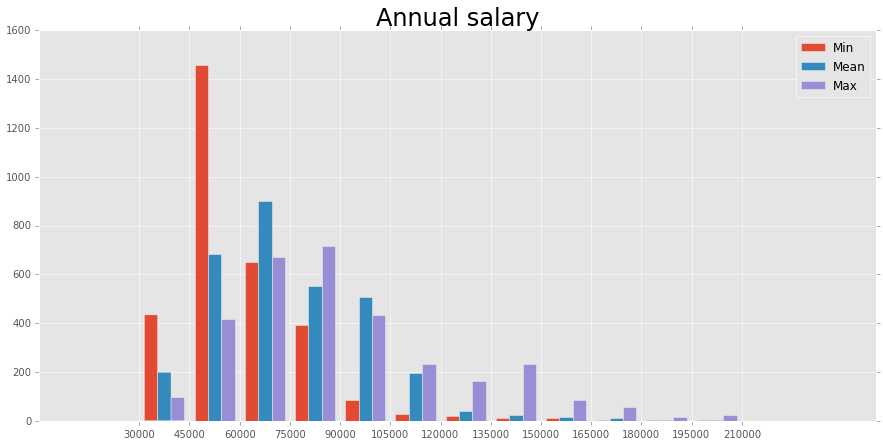

In [434]:
plot_all_in_one(annual_df, 15000, u'Annual salary')

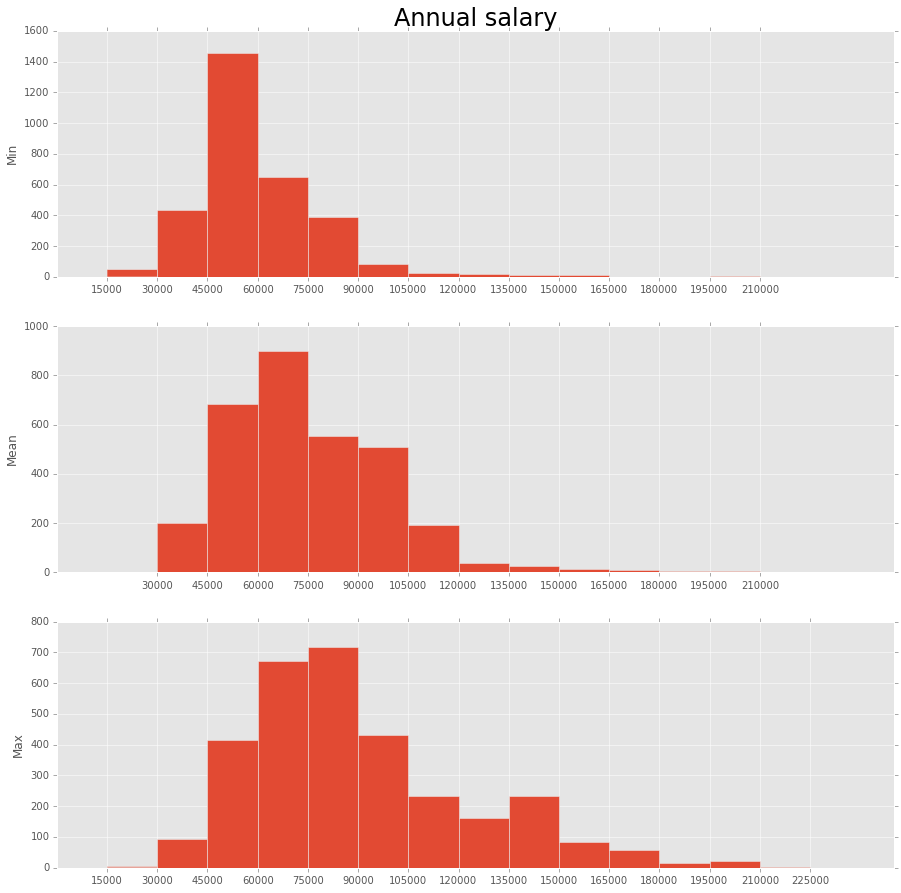

In [436]:
plot_salary_dist(annual_df, u'Annual salary', 15000, 250000)

## Hourly

In [437]:
hourly_df = data[(data.salary_frequency == HOURLY)]

In [438]:
hourly_df[['salary_range_from', 'salary_mean', 'salary_range_to']].describe()

,salary_range_from,salary_mean,salary_range_to
count,255.000000,255.000000,255.000000
mean,25.580392,28.588235,31.596078
std,17.147818,17.566999,18.624913
min,0.000000,9.000000,10.000000
25%,14.000000,15.000000,16.000000
50%,19.000000,23.500000,27.000000
75%,33.000000,35.250000,38.000000
max,71.000000,77.500000,87.000000


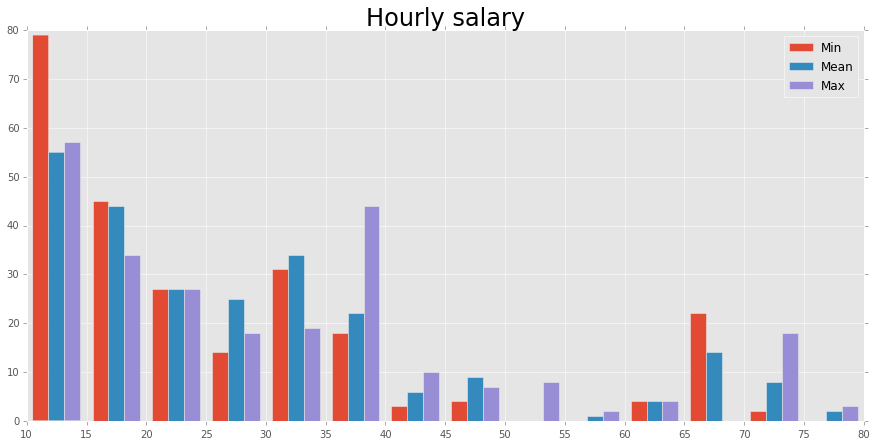

In [452]:
plot_all_in_one(hourly_df, 5, u'Hourly salary')

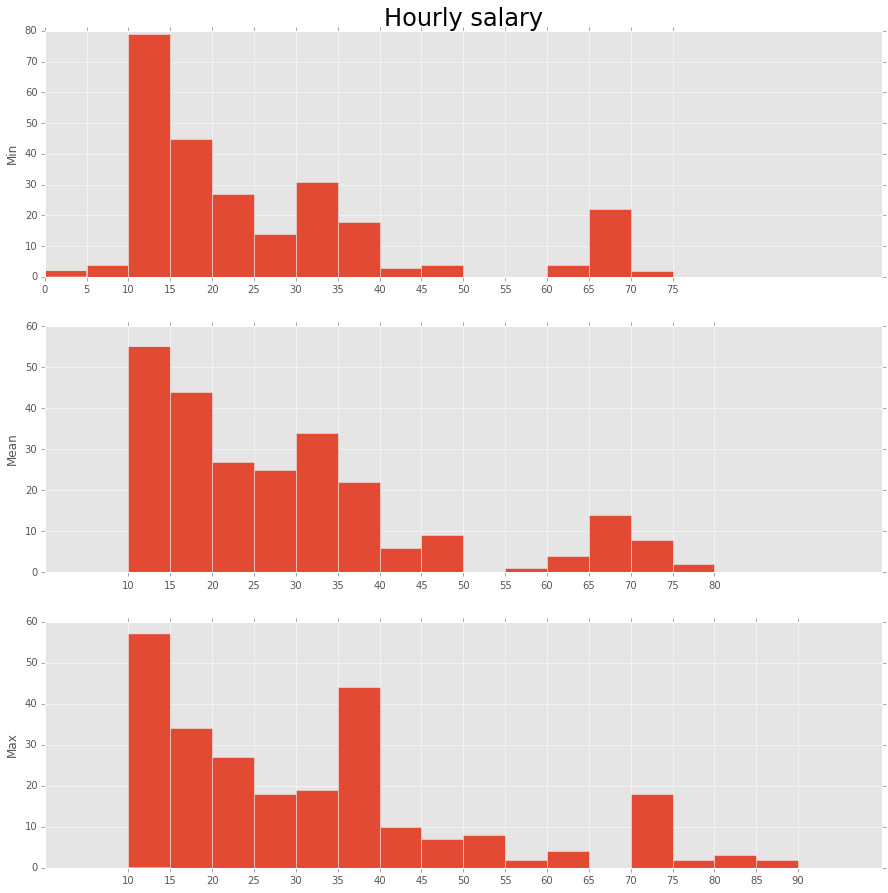

In [451]:
plot_salary_dist(hourly_df, u'Hourly salary', 5, 100)

## Daily Salary

In [442]:
daily_df = data[(data.salary_frequency == DAILY)]

In [443]:
daily_df[['salary_range_from', 'salary_mean', 'salary_range_to']].describe()

,salary_range_from,salary_mean,salary_range_to
count,28.000000,28.000000,28.000000
mean,305.357143,313.964286,322.571429
std,67.767147,63.283742,60.190702
min,198.000000,198.000000,198.000000
25%,251.000000,271.500000,292.000000
50%,298.500000,299.750000,310.000000
75%,356.000000,364.000000,364.000000
max,450.000000,450.000000,450.000000


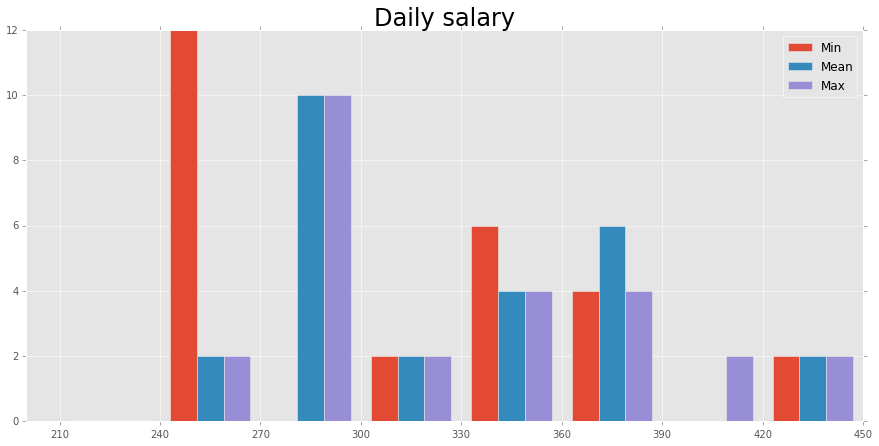

In [448]:
plot_all_in_one(daily_df, 30, u'Daily salary')

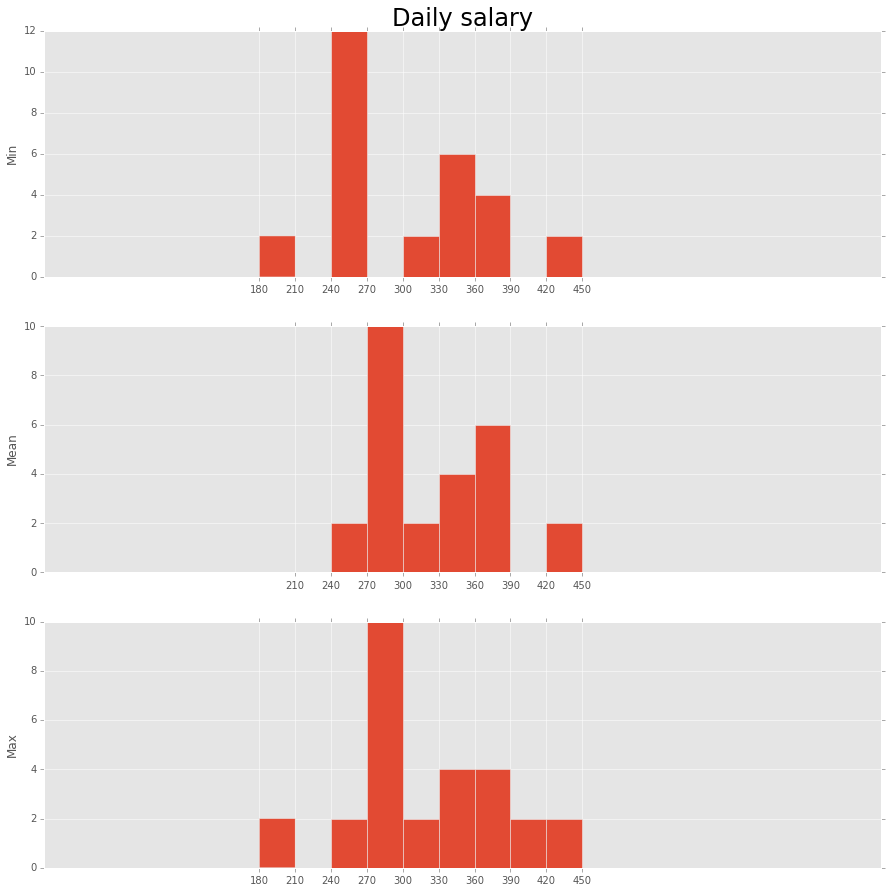

In [450]:
plot_salary_dist(daily_df, u'Daily salary', 30, 700)